## 2. Clustering

For this question, the following tasks have been undertaken:

1. Visualizing the data in DataClustering.csv and preprocessing it using the power transform.
2. Training k-means clustering on the data and finding the appropriate k.
3. Visualizing the cluster assignment using T-SNE embedding.

In [102]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


from sklearn.preprocessing import PowerTransformer

%matplotlib inline

### Part a 
    
Visualizing the data, clearly we can see below that the data is skewed and will require transformation. We will use Power Transformer from Sklearn for this purpose.

Power Transforms are a family of functions that create a monotonic transformation of data using Power Functions.  This stabilizes variance and makes the data more normal like to help with measures of association (correlation etc) validity improvement.

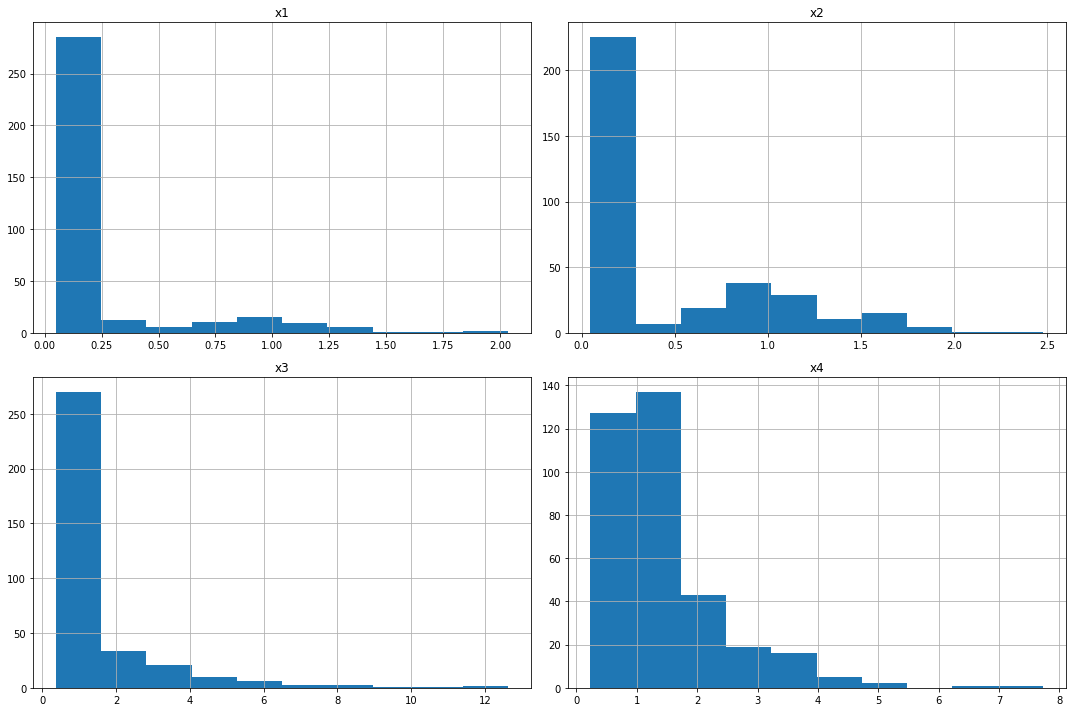

In [103]:
df1 = pd.read_csv("DataClustering.csv")
df1[['x1', 'x2', 'x3',
       'x4']].hist(figsize=(15,10))
plt.tight_layout()


We utilize Yeo-Johnson Power Transformer to the raw data.

\begin{aligned}
  y_i^{(\lambda)} & = ((y_i + 1)^\lambda - 1)/\lambda & \lambda \neq 0, y \geq 0 \\
  & = \log(y_i + 1) & \lambda = 0, y \geq 0 \\
  & = -((-y_i + 1)^{(2 - \lambda)} - 1)/(2 - \lambda) & \lambda \neq 2, y < 0 \\
  & = -\log(-y_i + 1) & \lambda = 2, y < 0 \\
\end{aligned}

The above transform allows for zero and negative values of $y$. Although there are no negative values, we have gone with this method.

References: 
  1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
  2. https://en.wikipedia.org/wiki/Power_transform
  

In [104]:
features = df1[['x1', 'x2', 'x3', 'x4']]
pt = PowerTransformer(method='yeo-johnson', standardize=True)
sk1_yj = pt.fit(features)
sk1_yj = pt.transform(features)
df_xt = pd.DataFrame(data=sk1_yj, columns=['x1', 'x2', 'x3', 'x4'])

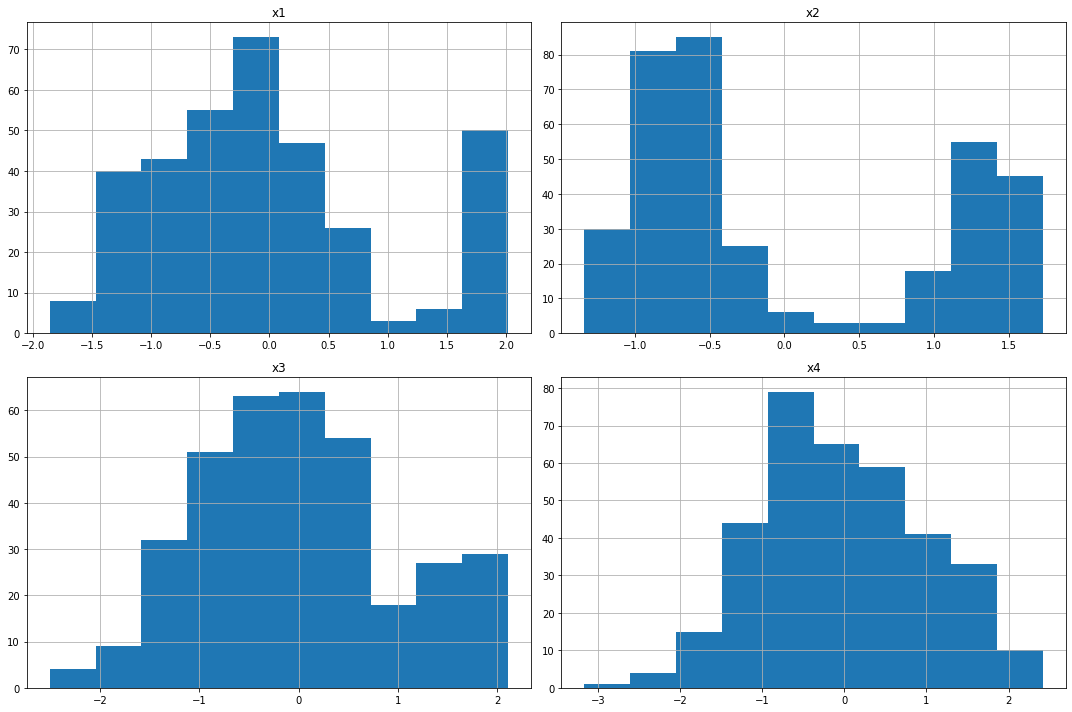

In [112]:
df_xt[['x1', 'x2', 'x3','x4']].hist(figsize=(15,10))
plt.tight_layout()

### Part b 
1. For finding the appropriate K using KMeans, we will take a range value for K and loop through to get the optimal cluster. 
2. The inertia value measures how well a dataset was clustered by KMeans.  It is calculated by measuring the distance between each datapoint and its centroid. 
3. A good model will have low inertia and low number of clusters. This comes from the elbow of the K and inertia graph

References:

1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Text(0, 0.5, 'Inertia')

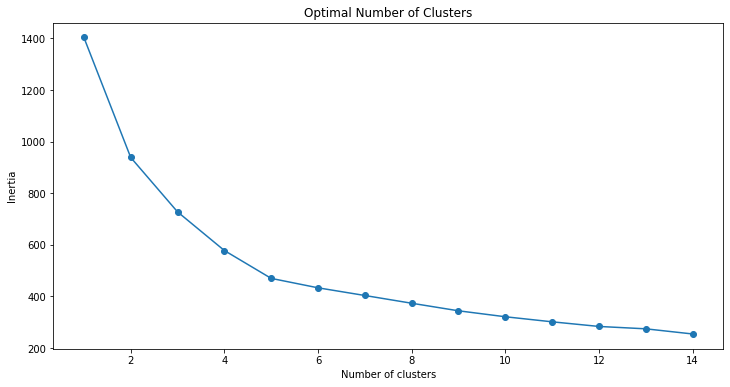

In [106]:
k_inertia = []
k_list = range(1, 15)  # Take a range value of clusters K 
# loop through K to determine the optimal cluster
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_xt)
    k_inertia.append([k, km.inertia_])
    
df_result = pd.DataFrame({'Cluster': range(1,15), 'K_in': k_inertia})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(k_inertia)[0], pd.DataFrame(k_inertia)[1], marker='o')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We can take the value of around 4 or 5 for appropriate clustering.

In [113]:
km = KMeans(n_clusters=4)
km4_cluster =  km.fit_predict(df_xt)
 
df_xt_km = pd.concat([df_xt, pd.DataFrame({'km4_cluster':km4_cluster})], axis=1)

### Part c

Using TSNE to visualize the data.
  
1. In this case we will use two components reduced by TSNE as the x and y of visualization.  
2. TSNE will generate two values for each combination of x1 to x4 as their representation of distance in two dimensions
3. Next we will utilize the optimal cluster DataFrame built as above that contains cluster assignment in column km4_cluster. 
4. The Seaborn scatter plot allows us to use "Hue" parameter.  This can be used as a value for the tsne data to give the color associated with the cluster. We shall use the above to assign a Hue value to km4_cluster.

References:

1. https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [109]:
tsne = TSNE(n_components=2, init='random', random_state=0, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_xt)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.000s...
[t-SNE] Computed neighbors for 351 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 1.066699
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.521278
[t-SNE] KL divergence after 1000 iterations: 0.302290


Add the TSNE values to overall KM dataframe.

In [110]:
df_xt_km['tsne1'] = tsne_scale_results[:,0]
df_xt_km['tsne2'] = tsne_scale_results[:,1]
df_xt_km.head()

,x1,x2,x3,x4,km4_cluster,tsne1,tsne2
0,1.892893,1.524854,-0.340075,-0.414077,3,0.131305,-9.676978
1,1.987377,1.562231,-0.473995,-1.039780,3,0.908636,-9.442608
2,1.941537,1.362540,0.139150,0.218409,3,-0.471234,-10.329366
3,1.950474,1.401740,0.104241,-0.434169,3,0.265482,-10.224778
4,1.956236,1.452761,-0.571026,0.664683,3,-1.013713,-9.552611


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

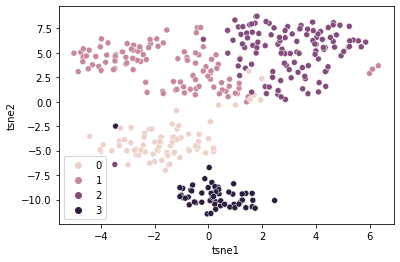

In [111]:
sns.scatterplot(x="tsne1", y="tsne2", hue=km4_cluster, data=df_xt_km)

### Conclusion

From the above scatter plot, we observe the k-means cluster for k = 4.